In [1]:
import numpy as np
import pandas as pd
import os
import shutil

In [2]:
ROOT_PATH = "C:/Users/abdewang.ORADEV/Data_Science_Preparation/Covid_19_Detection/"

## Covid - 19 Dataset

In [3]:
# Create Dataset for positive examples

FILE_PATH = "chest_XRay_github/metadata.csv"
IMAGES_PATH = "chest_XRay_github/images"

In [4]:
df = pd.read_csv(FILE_PATH)
df.shape

(950, 30)

In [5]:
df.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [6]:
df['finding'] = df.finding.str.split("/")

In [7]:
df.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,"[Pneumonia, Viral, COVID-19]",Y,Y,N,N,N,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,"[Pneumonia, Viral, COVID-19]",Y,Y,N,N,N,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,"[Pneumonia, Viral, COVID-19]",Y,Y,N,N,N,...,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,"[Pneumonia, Viral, COVID-19]",Y,Y,N,N,N,...,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,"[Pneumonia, Viral, COVID-19]",Y,NaN,N,N,N,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [8]:
os.getcwd()

'C:\\Users\\abdewang.ORADEV\\Data_Science_Preparation\\Covid_19_Detection'

In [9]:
COVID_IMAGE_DIR = 'Extracted_Dataset\Covid'

In [10]:
#Extract Covid 19 images to a folder

cnt = 0

for i,row in df.iterrows():
    # we only want covid 19 and front view that is PA view.
    if 'COVID-19' in row['finding'] and row["view"] =="PA":
        filename = row['filename']
        image_path = os.path.join(IMAGES_PATH,filename)
        image_copy_path = os.path.join(COVID_IMAGE_DIR,filename)
        shutil.copy2(image_path,image_copy_path)
        print("Moving image", cnt)
        cnt+=1

Moving image 0
Moving image 1
Moving image 2
Moving image 3
Moving image 4
Moving image 5
Moving image 6
Moving image 7
Moving image 8
Moving image 9
Moving image 10
Moving image 11
Moving image 12
Moving image 13
Moving image 14
Moving image 15
Moving image 16
Moving image 17
Moving image 18
Moving image 19
Moving image 20
Moving image 21
Moving image 22
Moving image 23
Moving image 24
Moving image 25
Moving image 26
Moving image 27
Moving image 28
Moving image 29
Moving image 30
Moving image 31
Moving image 32
Moving image 33
Moving image 34
Moving image 35
Moving image 36
Moving image 37
Moving image 38
Moving image 39
Moving image 40
Moving image 41
Moving image 42
Moving image 43
Moving image 44
Moving image 45
Moving image 46
Moving image 47
Moving image 48
Moving image 49
Moving image 50
Moving image 51
Moving image 52
Moving image 53
Moving image 54
Moving image 55
Moving image 56
Moving image 57
Moving image 58
Moving image 59
Moving image 60
Moving image 61
Moving image 62
Mo

### Train Test Split(Covid-19 Images)

In [11]:
covid_file_list = os.listdir(COVID_IMAGE_DIR)
len(covid_file_list)

196

In [12]:
import random
random.shuffle(covid_file_list)

In [13]:
TRAIN_COVID_DIR = "Covid_Dataset/train/Covid/"
VAL_COVID_DIR = "Covid_Dataset/val/Covid/"


if not os.path.exists(TRAIN_COVID_DIR):
    os.makedirs(TRAIN_COVID_DIR)
    print("Training Covid folder created")
    
if not os.path.exists(VAL_COVID_DIR):
    os.makedirs(VAL_COVID_DIR)
    print("Validation Covid folder created")

In [14]:
import math

split = 0.6
split_index = math.floor(len(covid_file_list) * split)
train = covid_file_list[:split_index]
val = covid_file_list[split_index:]

In [15]:
len(train)

117

In [16]:
len(val)

79

In [17]:
for image_names in train:
    train_source = os.path.join(COVID_IMAGE_DIR,image_names)
    train_target = os.path.join(TRAIN_COVID_DIR,image_names)
    if len(os.listdir(TRAIN_COVID_DIR)) <= 117-1:
        shutil.copy2(train_source,train_target)
    
for image_names in val:
    val_source = os.path.join(COVID_IMAGE_DIR,image_names)
    val_target = os.path.join(VAL_COVID_DIR,image_names)
    if len(os.listdir(VAL_COVID_DIR)) <= 79-1:
        shutil.copy2(val_source,val_target)

In [18]:
len(os.listdir(TRAIN_COVID_DIR))

117

In [19]:
len(os.listdir(VAL_COVID_DIR))

79

## Normal Dataset

In [20]:
# Sampling of images from kagle dataset

import random
KAGGLE_IMAGE_DIR = "chest_XRay_Kaggle/chest_xray/train/NORMAL"
NORMAL_IMAGE_DIR = "Extracted_Dataset/Normal"

In [21]:
image_names = os.listdir(KAGGLE_IMAGE_DIR)
image_names

['IM-0115-0001.jpeg',
 'IM-0117-0001.jpeg',
 'IM-0119-0001.jpeg',
 'IM-0122-0001.jpeg',
 'IM-0125-0001.jpeg',
 'IM-0127-0001.jpeg',
 'IM-0128-0001.jpeg',
 'IM-0129-0001.jpeg',
 'IM-0131-0001.jpeg',
 'IM-0133-0001.jpeg',
 'IM-0135-0001.jpeg',
 'IM-0137-0001.jpeg',
 'IM-0140-0001.jpeg',
 'IM-0141-0001.jpeg',
 'IM-0143-0001.jpeg',
 'IM-0145-0001.jpeg',
 'IM-0147-0001.jpeg',
 'IM-0149-0001.jpeg',
 'IM-0151-0001.jpeg',
 'IM-0152-0001.jpeg',
 'IM-0154-0001.jpeg',
 'IM-0156-0001.jpeg',
 'IM-0158-0001.jpeg',
 'IM-0160-0001.jpeg',
 'IM-0162-0001.jpeg',
 'IM-0164-0001.jpeg',
 'IM-0166-0001.jpeg',
 'IM-0168-0001.jpeg',
 'IM-0170-0001.jpeg',
 'IM-0172-0001.jpeg',
 'IM-0176-0001.jpeg',
 'IM-0177-0001.jpeg',
 'IM-0178-0001.jpeg',
 'IM-0180-0001.jpeg',
 'IM-0182-0001.jpeg',
 'IM-0183-0001.jpeg',
 'IM-0185-0001.jpeg',
 'IM-0187-0001.jpeg',
 'IM-0189-0001.jpeg',
 'IM-0191-0001.jpeg',
 'IM-0193-0001.jpeg',
 'IM-0195-0001.jpeg',
 'IM-0199-0001.jpeg',
 'IM-0201-0001.jpeg',
 'IM-0203-0001.jpeg',
 'IM-0205-

In [22]:
normal_file_list = os.listdir(NORMAL_IMAGE_DIR)
len(normal_file_list)

196

In [23]:
random.shuffle(image_names)

for i in range(196):
    image_name = image_names[i]
    image_path = os.path.join(KAGGLE_IMAGE_DIR,image_name)
    target_path = os.path.join(NORMAL_IMAGE_DIR,image_name)
    if len(normal_file_list) < 196:
        shutil.copy2(image_path,target_path)
        print("copying image", i)

### Train Test Split(Normal Images)

In [24]:
normal_file_list = os.listdir(NORMAL_IMAGE_DIR)
len(normal_file_list)

196

In [25]:
random.shuffle(normal_file_list)

In [26]:
TRAIN_NORMAL_DIR = "Covid_Dataset/train/Normal"
VAL_NORMAL_DIR = "Covid_Dataset/val/Normal"


if not os.path.exists(TRAIN_NORMAL_DIR):
    os.makedirs(TRAIN_NORMAL_DIR)
    print("Training Covid folder created")
    
if not os.path.exists(VAL_NORMAL_DIR):
    os.makedirs(VAL_NORMAL_DIR)
    print("Validation Covid folder created")

In [27]:
import math

split = 0.6
split_index = math.floor(len(normal_file_list) * split)
train = normal_file_list[:split_index]
val = normal_file_list[split_index:]

In [28]:
len(train)

117

In [29]:
len(val)

79

In [30]:
for image_names in train:
    train_source = os.path.join(NORMAL_IMAGE_DIR,image_names)
    train_target = os.path.join(TRAIN_NORMAL_DIR,image_names)
    if len(os.listdir(TRAIN_NORMAL_DIR)) <= 117-1:
        shutil.copy2(train_source,train_target)
    
for image_names in val:
    val_source = os.path.join(NORMAL_IMAGE_DIR,image_names)
    val_target = os.path.join(VAL_NORMAL_DIR,image_names)
    if len(os.listdir(VAL_NORMAL_DIR)) <= 79-1:
        shutil.copy2(val_source,val_target)

In [31]:
len(os.listdir(TRAIN_NORMAL_DIR))

117

In [32]:
len(os.listdir(VAL_NORMAL_DIR))

79

### CNN Model

In [33]:
TRAIN_PATH = "Covid_Dataset\train"
VAL_PATH = "CovidDataset\val"

In [34]:
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

Using TensorFlow backend.


In [35]:
model = Sequential()
model.add(Conv2D(filters = 32,kernel_size=(3,3),activation = 'relu', input_shape = (224,224,3)))
model.add(Conv2D(filters = 64,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [36]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 54, 54, 64)       

In [38]:
#Train the model

#Create data generator objects

train_datagen = image.ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [39]:
train_generator = train_datagen.flow_from_directory('Covid_Dataset/train',
                                                    target_size = (224,224),
                                                    batch_size=32,
                                                    classes=['Normal','Covid'],
                                                    class_mode='binary'
                                                   )
# for multiple classification then we can set the class_mode to categorical as well.

Found 234 images belonging to 2 classes.


In [40]:
train_generator.class_indices

{'Normal': 0, 'Covid': 1}

In [41]:
validation_generator = test_dataset.flow_from_directory('Covid_Dataset/val',
                                                        target_size = (224,224),
                                                        batch_size=32,
                                                        classes=['Normal','Covid'],
                                                        class_mode='binary'
                                                       )
# for multiple classification then we can set the class_mode to categorical as well.

Found 158 images belonging to 2 classes.


In [42]:
validation_generator.class_indices

{'Normal': 0, 'Covid': 1}

In [43]:
hist = model.fit_generator(train_generator,
                           steps_per_epoch=8,
                           epochs=10,
                           validation_data=validation_generator,
                           validation_steps=2,
                          )

Epoch 1/10
8/8 [==============================] - 59s 7s/step - loss: 1.6478 - accuracy: 0.5342 - val_loss: 0.6570 - val_accuracy: 0.5156
Epoch 2/10
8/8 [==============================] - 46s 6s/step - loss: 0.6760 - accuracy: 0.6068 - val_loss: 0.6748 - val_accuracy: 0.9062
Epoch 3/10
8/8 [==============================] - 48s 6s/step - loss: 0.5713 - accuracy: 0.7222 - val_loss: 0.5059 - val_accuracy: 0.9355
Epoch 4/10
8/8 [==============================] - 48s 6s/step - loss: 0.4840 - accuracy: 0.7821 - val_loss: 0.5240 - val_accuracy: 0.7500
Epoch 5/10
8/8 [==============================] - 50s 6s/step - loss: 0.5660 - accuracy: 0.7051 - val_loss: 0.3462 - val_accuracy: 0.8548
Epoch 6/10
8/8 [==============================] - 49s 6s/step - loss: 0.4424 - accuracy: 0.8120 - val_loss: 0.2876 - val_accuracy: 0.9531
Epoch 7/10
8/8 [==============================] - 45s 6s/step - loss: 0.3035 - accuracy: 0.9060 - val_loss: 0.1770 - val_accuracy: 0.9688
Epoch 8/10
8/8 [==================

In [44]:
model.evaluate_generator(train_generator)

[0.5164402723312378, 0.9487179517745972]

In [45]:
model.evaluate_generator(validation_generator)

[0.24093346297740936, 0.9683544039726257]

#### Confusion Matrix

In [46]:
y_actual = []
y_test = []

In [47]:
for i in os.listdir("C:/Users/abdewang.ORADEV/Data_Science_Preparation/Covid_19_Detection/Covid_Dataset/val/Normal/"):
    img = image.load_img("C:/Users/abdewang.ORADEV/Data_Science_Preparation/Covid_19_Detection/Covid_Dataset/val/Normal/"+i,target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img,axis = 0)
    p = model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(0)

In [48]:
for i in os.listdir("C:/Users/abdewang.ORADEV/Data_Science_Preparation/Covid_19_Detection/Covid_Dataset/val/Covid/"):
    img = image.load_img("C:/Users/abdewang.ORADEV/Data_Science_Preparation/Covid_19_Detection/Covid_Dataset/val/Covid/"+i,target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img,axis = 0)
    p = model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(1)

In [49]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [50]:
cm = confusion_matrix(y_actual,y_test)

In [51]:
import seaborn as sns

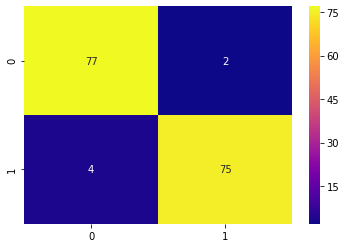

In [52]:
sns.heatmap(cm, cmap="plasma", annot = True)

In [53]:
accuracy_score(y_actual,y_test)

0.9620253164556962